**Loading Necessary packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


**Reading the dataset**

In [2]:
# Load the dataset
data = pd.read_csv('/content/Shopping Mall Customer Segmentation Data .csv')

data.columns

# Display the first few rows
print(data.head())

# Check for null values
print(data.isnull().sum())

# Summary of the dataset
print(data.describe())


                            Customer ID  Age  Gender  Annual Income  \
0  d410ea53-6661-42a9-ad3a-f554b05fd2a7   30    Male         151479   
1  1770b26f-493f-46b6-837f-4237fb5a314e   58  Female         185088   
2  e81aa8eb-1767-4b77-87ce-1620dc732c5e   62  Female          70912   
3  9795712a-ad19-47bf-8886-4f997d6046e3   23    Male          55460   
4  64139426-2226-4cd6-bf09-91bce4b4db5e   24    Male         153752   

   Spending Score  
0              89  
1              95  
2              76  
3              57  
4              76  
Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64
                Age  Annual Income  Spending Score
count  15079.000000   15079.000000    15079.000000
mean      54.191591  109742.880562       50.591617
std       21.119207   52249.425866       28.726977
min       18.000000   20022.000000        1.000000
25%       36.000000   64141.000000       26.000000
50%       54.000000  109190.000000

**size of the data**

In [3]:
data.shape

(15079, 5)

**Normalising on the features**

In [ ]:
# Select relevant features: Annual Income and Spending Score
X = data[['Annual Income', 'Spending Score']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**performing Elbow method and silhouette score**

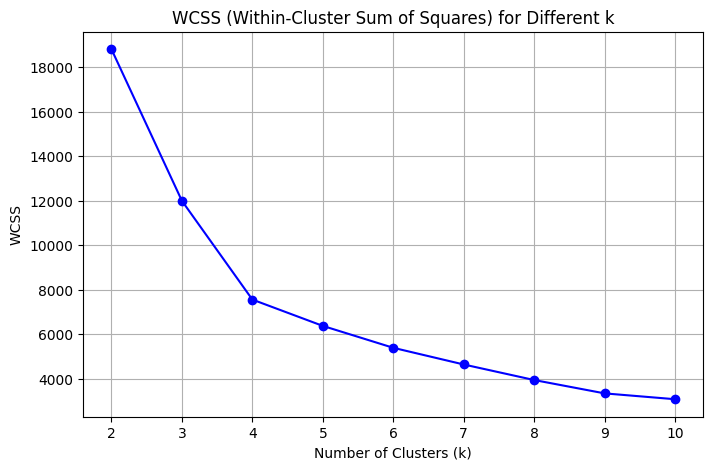

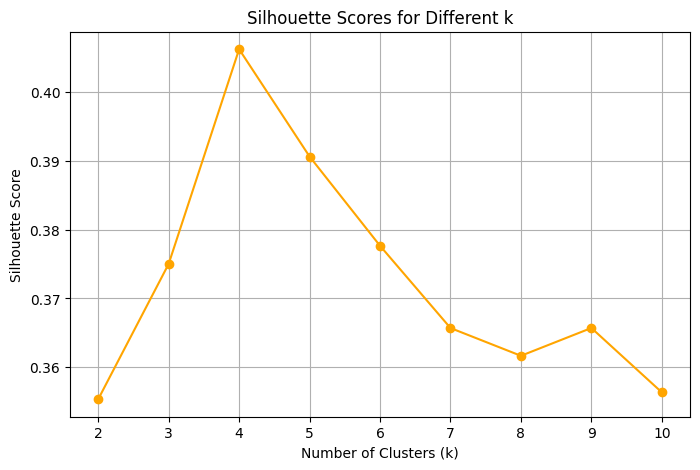

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate WCSS (Within-Cluster Sum of Squares) for a range of k values
wcss = []
silhouette_scores = []  # Store silhouette scores for each k
k_values = range(2, 11)  # Start from 2 to match silhouette score

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)

    # WCSS
    wcss.append(kmeans.inertia_)

    # Silhouette Score (only compute for k > 1)
    if k > 1:
        silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

# Plot the WCSS (Elbow Method)
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('WCSS (Within-Cluster Sum of Squares) for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


**Silhouette plot**

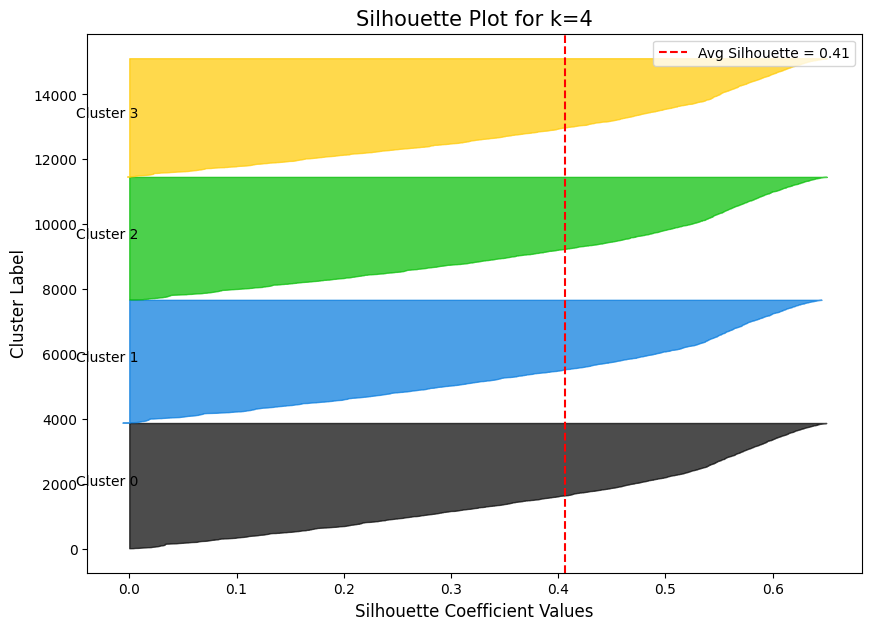

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

# Calculate the silhouette scores for each data point
k = 4  # Number of clusters (based on previous analysis)
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X_scaled, cluster_labels)
avg_silhouette = silhouette_score(X_scaled, cluster_labels)

# Set up the plot
plt.figure(figsize=(10, 7))
y_lower = 10  # Initial position for each cluster's silhouette

# Loop through each cluster to create the silhouette bars
for i in range(k):
    cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    cluster_silhouette_vals.sort()  # Sort for better visualization

    cluster_size = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + cluster_size  # Determine the range for this cluster's bars

    color = cm.nipy_spectral(float(i) / k)  # Assign color to the cluster
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label cluster in the middle of its range
    plt.text(-0.05, y_lower + 0.5 * cluster_size, f'Cluster {i}')

    y_lower = y_upper + 10  # 10 for spacing between clusters

# Add average silhouette score line
plt.axvline(avg_silhouette, color="red", linestyle="--", label=f"Avg Silhouette = {avg_silhouette:.2f}")

# Labeling and decoration
plt.title("Silhouette Plot for k=4", fontsize=15)
plt.xlabel("Silhouette Coefficient Values", fontsize=12)
plt.ylabel("Cluster Label", fontsize=12)
plt.legend(loc="best")
plt.grid(False)
plt.show()


**Comparision over K-means and radom initilisaion**

In [ ]:
def evaluate_clustering(init_method, X_scaled):
    wcss = []
    silhouette_scores = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, init=init_method, random_state=42)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    return wcss, silhouette_scores


In [ ]:
wcss_kmeanspp, silhouette_kmeanspp = evaluate_clustering('k-means++', X_scaled)
wcss_random, silhouette_random = evaluate_clustering('random', X_scaled)


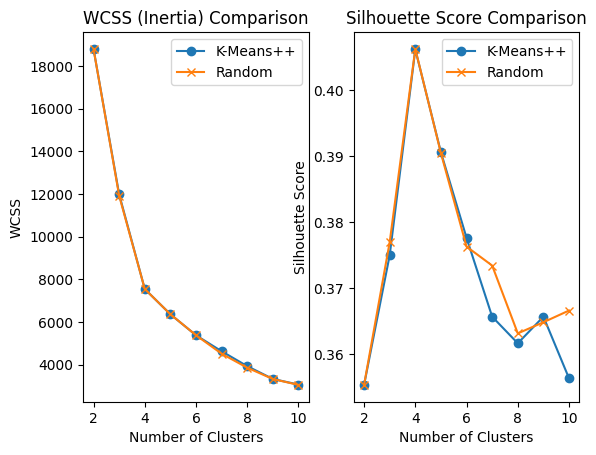

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss_kmeanspp, label='K-Means++', marker='o')
plt.plot(range(2, 11), wcss_random, label='Random', marker='x')
plt.title('WCSS (Inertia) Comparison')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_kmeanspp, label='K-Means++', marker='o')
plt.plot(range(2, 11), silhouette_random, label='Random', marker='x')
plt.title('Silhouette Score Comparison')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
